Minimum Portfolio Risk: 0.038662922907956344
Optimal Asset Order for Minimum Risk: ('Bonds', 'Sensex', 'currency', 'Nifty 50', 'Gold')

Optimal Covariance Matrix after Orthogonalization:
             Bonds    Sensex  currency  Nifty 50      Gold
Bonds     0.008372  0.000120  0.000175  0.000028  0.000088
Sensex    0.000120  0.007941 -0.000674 -0.000110 -0.000340
currency  0.000175 -0.000674  0.007421 -0.000160 -0.000495
Nifty 50  0.000028 -0.000110 -0.000160  0.008377 -0.000081
Gold      0.000088 -0.000340 -0.000495 -0.000081  0.008154


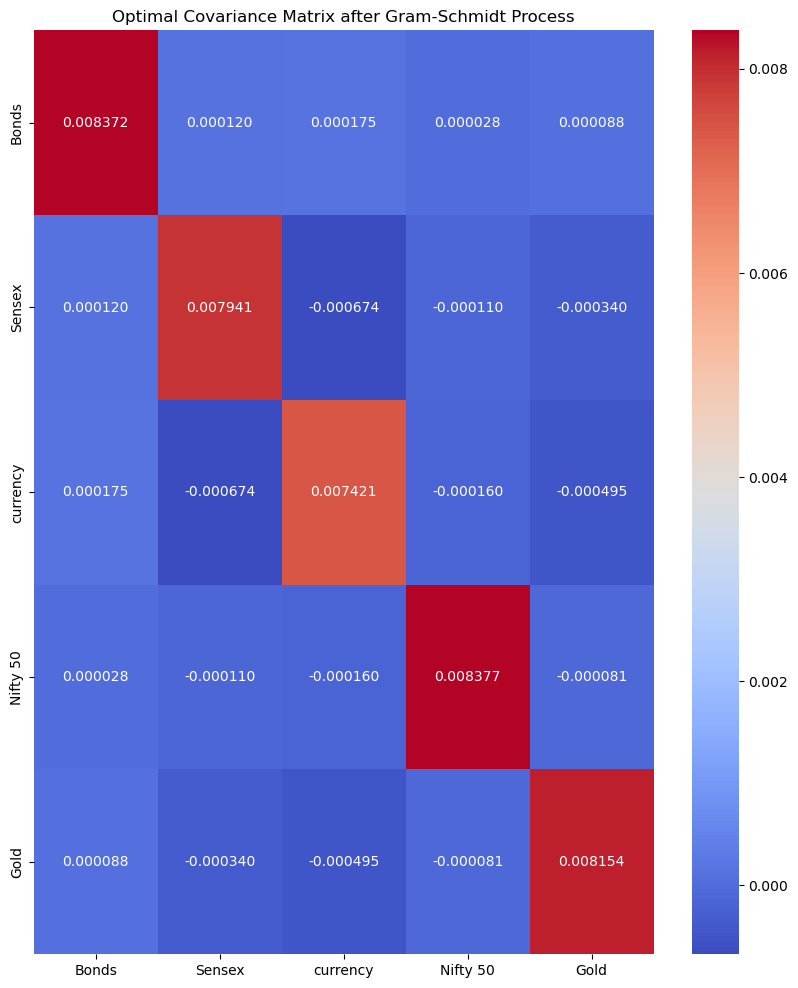

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.optimize import minimize

# Load data (assuming the data is loaded and formatted as before)
sensex = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\BSE Sensex Data.xlsx")
bonds = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\India Bond Yeild Data.xlsx")
nifty_50 = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Nifty 50 Data.xlsx") 
gold = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\Gold Rates Data.xlsx")
USD_INR = pd.read_excel(r"C:\Users\Sandesh\Project\NMIMS Project\USD_INR Data.xlsx")

# Combine assets into a DataFrame
returns = pd.DataFrame({
    'Sensex': sensex['Change %'],
    'Bonds': bonds['Change %'],
    'Nifty 50': nifty_50['Change %'],
    'Gold': gold['Change %'],
    'currency': USD_INR['Change %']
})

# Function to perform Gram-Schmidt orthogonalization
def gram_schmidt_process(matrix):
    matrix = matrix.values.T
    orthogonalized = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        vec = matrix[i]
        for j in range(i):
            vec -= np.dot(orthogonalized[j], matrix[i]) * orthogonalized[j]
        orthogonalized[i] = vec / np.linalg.norm(vec)
    return orthogonalized.T

# Function to orthogonalize returns data in a specific order
def orthogonalize_with_order(returns_data, order):
    ordered_data = returns_data.loc[:, order]  # Use loc to properly reorder columns
    orthogonalized_matrix = gram_schmidt_process(ordered_data)
    return orthogonalized_matrix, ordered_data.columns

# Function to calculate portfolio risk for a given orthogonalized matrix
def calculate_portfolio_risk(orthogonalized_cov_matrix, weights):
    portfolio_var = np.dot(weights.T, np.dot(orthogonalized_cov_matrix, weights))
    return np.sqrt(portfolio_var)

# Assume equal weights initially for simplicity
asset_names = returns.columns
initial_weights = np.array([1 / len(asset_names)] * len(asset_names))

# Track the minimum risk and corresponding asset order
min_risk = float('inf')
optimal_order = None
optimal_cov_matrix = None

# Iterate over all possible permutations of the asset order
for order in permutations(asset_names):
    orthogonalized_data, ordered_columns = orthogonalize_with_order(returns, order)
    orthogonalized_cov_matrix = np.cov(orthogonalized_data.T)
    orthogonalized_cov_df = pd.DataFrame(orthogonalized_cov_matrix, columns=ordered_columns, index=ordered_columns)
    
    # Calculate portfolio risk using the initial equal weights
    risk = calculate_portfolio_risk(orthogonalized_cov_df, initial_weights)
    
    # Update minimum risk and save optimal order if this risk is lower
    if risk < min_risk:
        min_risk = risk
        optimal_order = order
        optimal_cov_matrix = orthogonalized_cov_df

# Display the results
print("Minimum Portfolio Risk:", min_risk)
print("Optimal Asset Order for Minimum Risk:", optimal_order)
print("\nOptimal Covariance Matrix after Orthogonalization:")
print(optimal_cov_matrix)

# Plot the optimal covariance matrix
plt.figure(figsize=(10, 12))
sns.heatmap(optimal_cov_matrix, annot=True, cmap="coolwarm", fmt=".6f")
plt.title("Optimal Covariance Matrix after Gram-Schmidt Process")
plt.show()


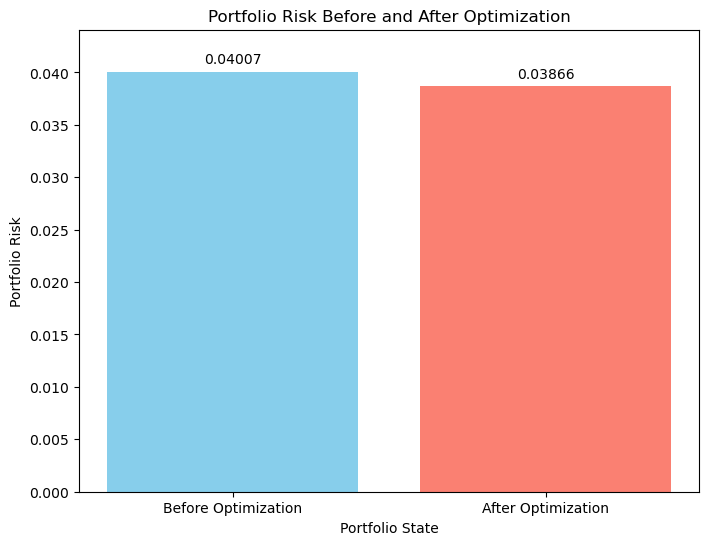

In [3]:
import matplotlib.pyplot as plt

# Define the initial and minimized portfolio risks
initial_portfolio_risk = 0.04006946737344428  # Replace with your initial portfolio risk
optimized_portfolio_risk = 0.03866292290795632  # Replace with your minimized portfolio risk after optimization

# Define labels and values for the bar plot
labels = ['Before Optimization', 'After Optimization']
risks = [initial_portfolio_risk, optimized_portfolio_risk]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, risks, color=['skyblue', 'salmon'])
plt.xlabel("Portfolio State")
plt.ylabel("Portfolio Risk")
plt.title("Portfolio Risk Before and After Optimization")
plt.ylim(0, max(risks) * 1.1)  # Add a bit of space above the bars for better readability

# Annotate risk values on top of each bar
for i, risk in enumerate(risks):
    plt.text(i, risk + 0.0005, f"{risk:.5f}", ha='center', va='bottom', fontsize=10)

plt.show()


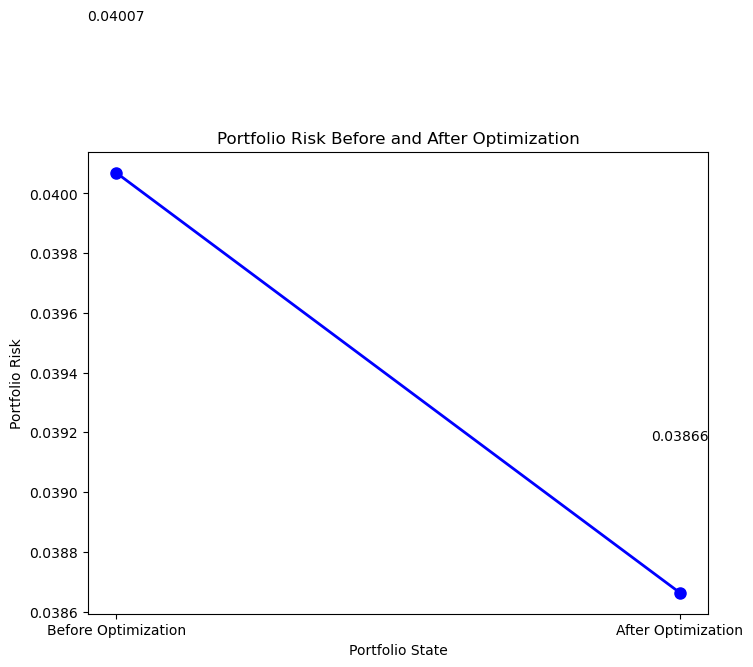

In [4]:
import matplotlib.pyplot as plt

# Define the initial and optimized portfolio risks
initial_portfolio_risk = 0.04006946737344428  # Initial risk before optimization
optimized_portfolio_risk = 0.03866292290795632  # Optimized risk after reordering

# Data for plotting
states = ['Before Optimization', 'After Optimization']
risks = [initial_portfolio_risk, optimized_portfolio_risk]

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(states, risks, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Labeling the graph
plt.xlabel("Portfolio State")
plt.ylabel("Portfolio Risk")
plt.title("Portfolio Risk Before and After Optimization")

# Add data labels to each point
for i, risk in enumerate(risks):
    plt.text(states[i], risk + 0.0005, f"{risk:.5f}", ha='center', va='bottom', fontsize=10)

plt.show()
